In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

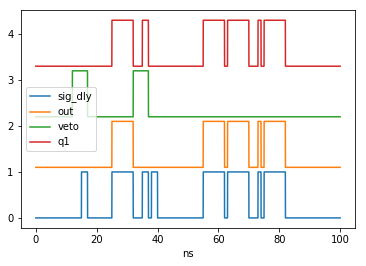

In [25]:
##################################################
##             basic discriminator              ##
##################################################

t = np.linspace(0,100e-9,10000) # be sure to make not to few steps, if you have a sharp IR
y = ( t > 10e-9)* (t < 12e-9) \
    + ( t > 20e-9)* (t < 27e-9)\
    + ( t > 30e-9)* (t < 32e-9)\
    + ( t > 33e-9)* (t < 35e-9)\
    + ( t > 50e-9)* (t < 57e-9)\
    + ( t > 68e-9)* (t < 69e-9)\
    + ( t > 58e-9)* (t < (58+7)*1e-9)\
    + ( t > 70e-9)* (t < (70+7)*1e-9)\
    + 0


sig = y

delay = 5e-9

dummy,sig_dly = shift_time(t,sig,delay)

sig_dly_fe = falling_edge_detect(sig_dly)


s1 = rising_edge_detect( sig * sig_dly)
r1 = sig_dly_fe

q1 = SR_FF(s1,r1)


sig_fe = falling_edge_detect(sig)

spurious = sig_fe * (1-q1)
dummy, spurious_dly = shift_time(t,spurious,delay)

veto = SR_FF(spurious,spurious_dly)

out = q1 * (1-veto)

#plt.plot(t*1e9,y,label="sig")
plt.plot(t*1e9,sig_dly,label="sig_dly")
#plt.plot(t*1e9,sig_dly_fe,label="sig_dly_fe")
#plt.plot(t*1e9,s1,label="s1")
#plt.plot(t*1e9,q1,label="q1")
#plt.plot(t*1e9,spurious,label="spurious")
plt.plot(t*1e9,out+1.1,label="out")
plt.plot(t*1e9,veto+2.2,label="veto")
plt.plot(t*1e9,q1+3.3,label="q1")

plt.xlabel("ns")
plt.legend()
plt.show()
